In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [29]:
#Load the dataset
data = pd.read_csv("C:\\Users\\rajjv\\Downloads\\archive\\TCS.NSE.csv")

data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,1283.500000,1283.500000,1270.500000,1272.775024,1114.909302,366830.0
1,2015-01-02,1275.500000,1295.474976,1275.300049,1289.724976,1129.757202,925740.0
2,2015-01-05,1290.500000,1299.949951,1262.324951,1270.125000,1112.587769,1754242.0
3,2015-01-06,1264.550049,1264.550049,1220.000000,1223.300049,1071.570801,2423784.0
4,2015-01-07,1235.000000,1239.574951,1203.724976,1208.849976,1058.912842,2636332.0
5,2015-01-08,1221.199951,1224.500000,1210.275024,1221.900024,1070.343994,1565408.0
6,2015-01-09,1227.500000,1259.949951,1225.000000,1256.150024,1100.346191,3197642.0
7,2015-01-12,1258.500000,1264.000000,1240.125000,1254.849976,1099.207397,1596006.0
8,2015-01-13,1260.000000,1265.199951,1240.050049,1248.949951,1094.039185,1468432.0
9,2015-01-14,1258.000000,1265.900024,1250.250000,1260.974976,1104.572876,1787096.0


In [30]:
# Extract the 'Close' prices as the target variable
data = data[['Date', 'Close']]

# Sort the data by date in ascending order
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')

In [31]:
print(data)

           Date        Close
0    2015-01-01  1272.775024
1    2015-01-02  1289.724976
2    2015-01-05  1270.125000
3    2015-01-06  1223.300049
4    2015-01-07  1208.849976
...         ...          ...
1661 2021-09-24  3871.300049
1662 2021-09-27  3836.949951
1663 2021-09-28  3779.149902
1664 2021-09-29  3791.899902
1665 2021-09-30  3775.550049

[1666 rows x 2 columns]


In [32]:
# Create a variable to predict 'n' days in the future
n = 30

data['Target'] = data['Close'].shift(-n)

# Drop rows with missing target values
data = data.dropna()

# Convert the dataframe to a NumPy array
dataset = data[['Close', 'Target']].values

# Normalize the data
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

# Split the dataset into training and testing sets
X_training = []
y_testing = []
for i in range(len(dataset) - n):
    X_training.append(dataset[i:i+n, 0])
    y_testing.append(dataset[i+n, 1])

X_training = np.array(X)
y_testing = np.array(y)


In [33]:
print(X_training)


[[0.08879212 0.0955654  0.08773316 ... 0.07167903 0.07212859 0.08743346]
 [0.0955654  0.08773316 0.06902171 ... 0.07212859 0.08743346 0.09663436]
 [0.08773316 0.06902171 0.06324739 ... 0.08743346 0.09663436 0.10679427]
 ...
 [0.91546367 0.90905    0.90727178 ... 0.91242664 0.91654259 0.91955962]
 [0.90905    0.90727178 0.88381503 ... 0.91654259 0.91955962 0.96417541]
 [0.90727178 0.88381503 0.88886998 ... 0.91955962 0.96417541 0.96799165]]


In [34]:
print(y_testing)

[0.07796211 0.07601649 0.07681714 ... 0.93959998 0.94399052 0.93836035]


In [35]:
#Train and test the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print(X_train)

[[0.80491316 0.80569237 0.84235607 ... 0.83210616 0.83714122 0.82799032]
 [0.07793285 0.08582504 0.09397698 ... 0.07896186 0.07098973 0.07093978]
 [0.08745346 0.09653446 0.10290813 ... 0.10613496 0.10677432 0.10632476]
 ...
 [0.32265058 0.31653662 0.31855464 ... 0.37118251 0.3696241  0.36634731]
 [0.70339365 0.69280414 0.69252443 ... 0.86761105 0.88317562 0.90239663]
 [0.45098349 0.461593   0.45134319 ... 0.43278159 0.43611823 0.43933506]]


In [37]:
print(X_test)

[[0.072768   0.06200863 0.07605473 ... 0.06204858 0.05996066 0.0597209 ]
 [0.08908183 0.08665425 0.0910499  ... 0.08089994 0.08270815 0.09146945]
 [0.08917173 0.08763326 0.08774316 ... 0.07409666 0.07744335 0.08503583]
 ...
 [0.09146945 0.09020074 0.09518579 ... 0.08118964 0.0826482  0.07650429]
 [0.36834533 0.3608927  0.28742545 ... 0.2872856  0.33074257 0.30688621]
 [0.11276838 0.12165958 0.12664464 ... 0.1053457  0.0912397  0.08880212]]


In [38]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [39]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
40/40 [==============================] - 11s 44ms/step - loss: 0.0122
Epoch 2/50
40/40 [==============================] - 2s 48ms/step - loss: 0.0029
Epoch 3/50
40/40 [==============================] - 2s 48ms/step - loss: 0.0029
Epoch 4/50
40/40 [==============================] - 2s 48ms/step - loss: 0.0030
Epoch 5/50
40/40 [==============================] - 2s 48ms/step - loss: 0.0031
Epoch 6/50
40/40 [==============================] - 2s 48ms/step - loss: 0.0029
Epoch 7/50
40/40 [==============================] - 2s 47ms/step - loss: 0.0030
Epoch 8/50
40/40 [==============================] - 2s 48ms/step - loss: 0.0030
Epoch 9/50
40/40 [==============================] - 2s 48ms/step - loss: 0.0029
Epoch 10/50
40/40 [==============================] - 2s 48ms/step - loss: 0.0030
Epoch 11/50
40/40 [==============================] - 2s 49ms/step - loss: 0.0029
Epoch 12/50
40/40 [==============================] - 2s 48ms/step - loss: 0.0030
Epoch 13/50
40/40 [=================

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)

In [42]:
print(y_pred)

[[0.07021393]
 [0.07959824]
 [0.08979623]
 [0.10015841]
 [0.32221934]
 [0.765538  ]
 [0.28442946]
 [0.05215034]
 [0.04580038]
 [0.07581291]
 [0.08241282]
 [0.41443208]
 [0.30653003]
 [0.83531946]
 [0.06319314]
 [0.0882242 ]
 [0.09419882]
 [0.37430504]
 [0.10573314]
 [0.3930595 ]
 [0.74181247]
 [0.04145566]
 [0.77069795]
 [0.10496341]
 [0.09508932]
 [0.37676373]
 [0.32234123]
 [0.79415786]
 [0.09863374]
 [0.10434899]
 [0.09555016]
 [0.07616016]
 [0.35938033]
 [0.7754965 ]
 [0.06317042]
 [0.412343  ]
 [0.09783311]
 [0.08013551]
 [0.09361294]
 [0.08754112]
 [0.07624257]
 [0.1010699 ]
 [0.7869609 ]
 [0.10045692]
 [0.7839288 ]
 [0.09265386]
 [0.0884842 ]
 [0.09422146]
 [0.07935439]
 [0.3790341 ]
 [0.44663066]
 [0.38773927]
 [0.25827774]
 [0.06377664]
 [0.60752   ]
 [0.71503025]
 [0.07761227]
 [0.09288514]
 [0.06290916]
 [0.07990799]
 [0.07924816]
 [0.09439573]
 [0.7385255 ]
 [0.40828043]
 [0.17750134]
 [0.08336835]
 [0.07678831]
 [0.35604241]
 [0.17057322]
 [0.1125448 ]
 [0.3266244 ]
 [0.06

In [43]:
print(y_pred.shape)

(320, 1)


In [44]:
print(y_test)

[0.07240938 0.03804272 0.03923073 0.06385215 0.29054144 0.73779047
 0.30954985 0.04319943 0.07594764 0.10370269 0.03776721 0.35739804
 0.32284196 0.86174124 0.06340447 0.08868879 0.07085978 0.31600651
 0.05542405 0.394709   0.72107199 0.06504878 0.73837586 0.04591123
 0.07218554 0.343004   0.31671246 0.71019032 0.09434485 0.14160765
 0.06858704 0.08804313 0.35424722 0.76576936 0.01843164 0.41633454
 0.07772969 0.05979735 0.05061169 0.04729727 0.08318772 0.17862588
 0.74025258 0.07336497 0.76557995 0.07822899 0.05999538 0.08221489
 0.04275175 0.37440925 0.49512303 0.39818694 0.29696363 0.01182865
 0.58505154 0.65342335 0.0659269  0.08098384 0.01620195 0.06929298
 0.0947064  0.07031743 0.71098235 0.41332143 0.23480745 0.08466843
 0.09002317 0.35509087 0.24637784 0.09053109 0.41988134 0.07885743
 0.73932283 0.32576899 0.06686526 0.41390682 0.63987293 0.41581801
 0.69572738 0.76559718 0.36950219 0.3475839  0.58097089 0.086571
 0.83086971 0.39269448 0.08633858 0.23072685 0.08107854 0.081216

In [45]:
print(y_test.shape)

(320,)


In [46]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.002298167922495019


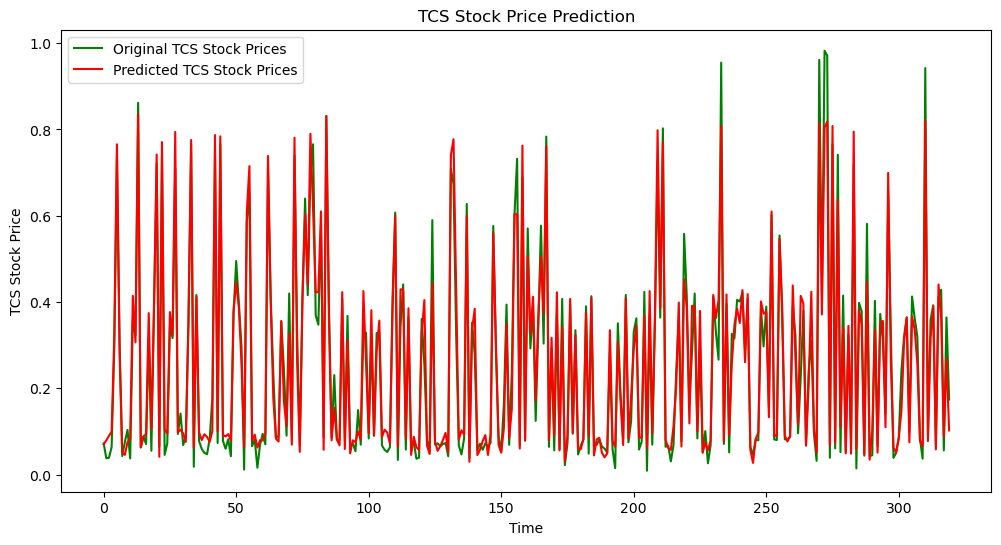

In [48]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Original TCS Stock Prices', color='green')
plt.plot(y_pred, label='Predicted TCS Stock Prices', color='red')
plt.xlabel('Time')
plt.ylabel('TCS Stock Price')
plt.title('TCS Stock Price Prediction')
plt.legend()
plt.show()